<a href="https://colab.research.google.com/github/Shailajai6/Text-Mining_NLP/blob/master/Text_Mining_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import nltk
nltk.download('stopwords') # to remove stopwords
nltk.download('punkt')
nltk.download('words')
import sklearn
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,RegexpTokenizer
from nltk.stem import WordNetLemmatizer
import string
from nltk import pos_tag
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
pip install VaderSentiment

     |████████████████████████████████| 133kB 2.6MB/s 


In [4]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import statsmodels.formula.api as smf

import math 

from sklearn import metrics 
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

import matplotlib.pyplot as plt
import seaborn as sns

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [5]:
import pandas as pd
import numpy as np
from plotly import __version__
%matplotlib inline
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

init_notebook_mode(connected=True)
cf.go_offline()

In [13]:
!git clone https://github.com/Shailajai6/Text-Mining_NLP

Cloning into 'Text-Mining_NLP'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (6/6), done.


In [22]:
!dir Text-Mining_NLP

README.md  Womens\ Clothing\ E-Commerce\ Reviews.csv


In [29]:
path= 'Text-Mining_NLP/Womens Clothing E-Commerce Reviews.csv'

In [39]:
df = pd.read_csv(path,delimiter=',')
df = df.dropna(subset=["Review Text"]).reset_index(drop=True)

In [41]:
df.columns=['ID','Clothing_ID','Age','Title','Review','Rating','Recommended','Positive_count','Division_Name','Department_Name','Class_Name']
df.head()

ID  Clothing_ID  Age  ...   Division_Name Department_Name  Class_Name
0   0          767   33  ...       Initmates        Intimate   Intimates
1   1         1080   34  ...         General         Dresses     Dresses
2   2         1077   60  ...         General         Dresses     Dresses
3   3         1049   50  ...  General Petite         Bottoms       Pants
4   4          847   47  ...         General            Tops     Blouses

[5 rows x 11 columns]

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22641 entries, 0 to 22640
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               22641 non-null  int64 
 1   Clothing_ID      22641 non-null  int64 
 2   Age              22641 non-null  int64 
 3   Title            19675 non-null  object
 4   Review           22641 non-null  object
 5   Rating           22641 non-null  int64 
 6   Recommended      22641 non-null  int64 
 7   Positive_count   22641 non-null  int64 
 8   Division_Name    22628 non-null  object
 9   Department_Name  22628 non-null  object
 10  Class_Name       22628 non-null  object
dtypes: int64(6), object(5)
memory usage: 1.9+ MB


In [43]:
df.isnull().sum()

ID                    0
Clothing_ID           0
Age                   0
Title              2966
Review                0
Rating                0
Recommended           0
Positive_count        0
Division_Name        13
Department_Name      13
Class_Name           13
dtype: int64

In [44]:
df.describe()

ID   Clothing_ID  ...   Recommended  Positive_count
count  22641.000000  22641.000000  ...  22641.000000    22641.000000
mean   11740.849035    919.332362  ...      0.818868        2.630582
std     6781.957509    202.266874  ...      0.385136        5.786164
min        0.000000      1.000000  ...      0.000000        0.000000
25%     5872.000000    861.000000  ...      1.000000        0.000000
50%    11733.000000    936.000000  ...      1.000000        1.000000
75%    17621.000000   1078.000000  ...      1.000000        3.000000
max    23485.000000   1205.000000  ...      1.000000      122.000000

[8 rows x 6 columns]

In [45]:
import seaborn as sns

In [46]:
df=df.dropna(subset=["Review"]).reset_index(drop=True) # removing null review
df=df.dropna(subset=["Title"]).reset_index(drop=True) 
df=df.dropna(subset=["Division_Name"]).reset_index(drop=True) 

In [47]:
df.drop(labels =['ID','Clothing_ID'],axis = 1,inplace = True)

In [48]:
df.isnull().sum()

Age                0
Title              0
Review             0
Rating             0
Recommended        0
Positive_count     0
Division_Name      0
Department_Name    0
Class_Name         0
dtype: int64

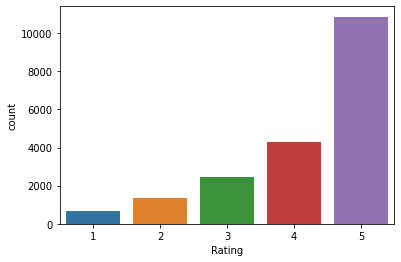

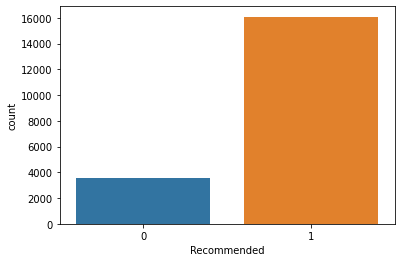

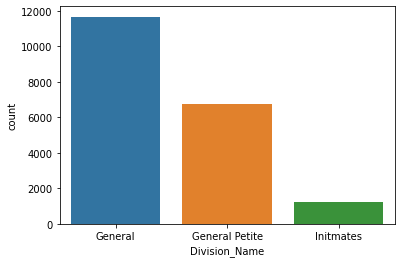

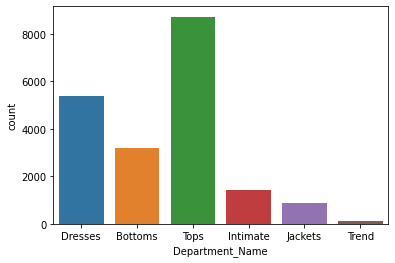

In [49]:
col=['Rating','Recommended','Division_Name','Department_Name']
for i in col:
    sns.countplot(x=i,data=df)
    plt.show()

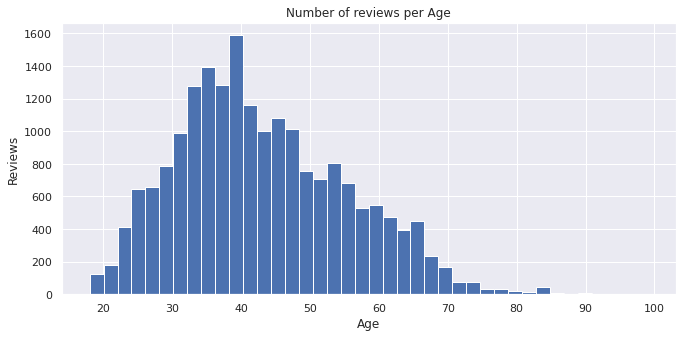

In [50]:
sns.set(rc={'figure.figsize':(11,5)})
plt.hist(df.Age, bins=40)
plt.xlabel('Age')
plt.ylabel('Reviews')
plt.title('Number of reviews per Age');

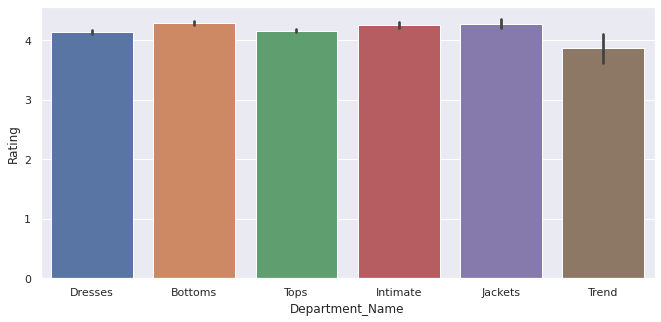

In [51]:
sns.barplot(df.Department_Name,df.Rating)

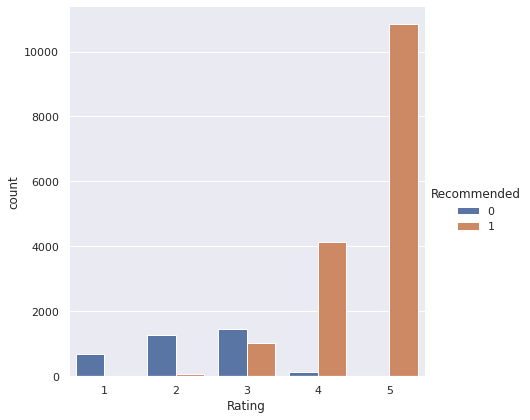

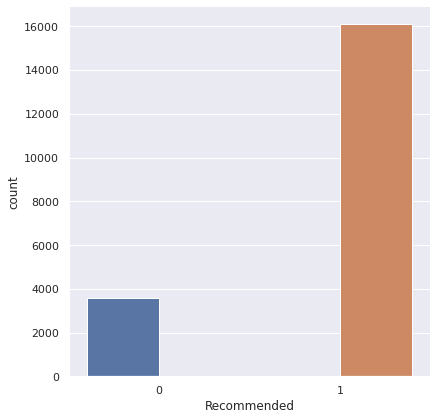

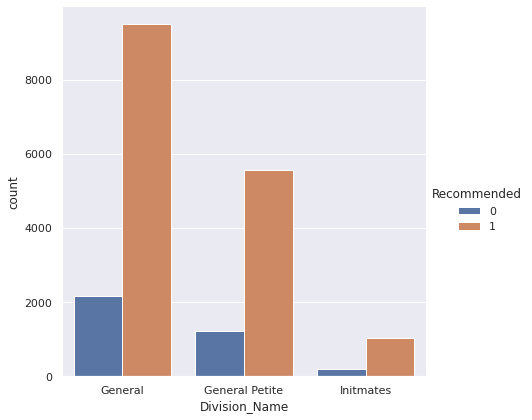

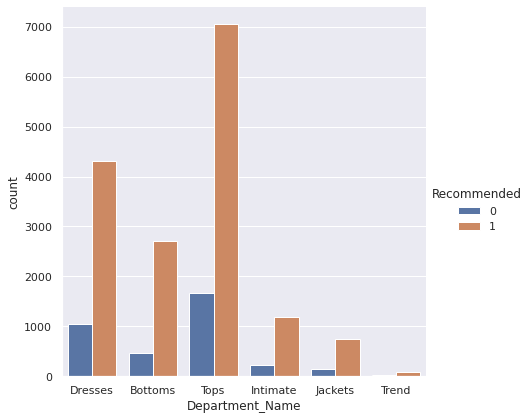

In [52]:
for i in col:
    sns.catplot(x=i,data=df,kind='count',hue='Recommended',height=6)
    plt.show()

In [53]:
print(df.groupby(df.Recommended).size())

Recommended
0     3575
1    16087
dtype: int64


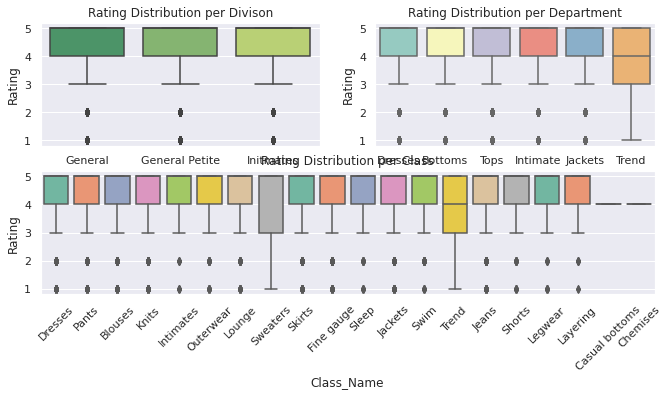

In [54]:
ax1 = plt.subplot2grid((2, 2), (0, 0))
ax1 = sns.boxplot(x="Division_Name", y="Rating", data=df,palette='summer')
ax1 = plt.title('Rating Distribution per Divison')

ax2 = plt.subplot2grid((2, 2), (0, 1))
ax2 = sns.boxplot(x="Department_Name", y="Rating", data=df,palette='Set3')
ax2 = plt.title('Rating Distribution per Department')

ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=2)
ax3 = plt.xticks(rotation=45)
ax3 = sns.boxplot(x="Class_Name", y="Rating", data=df,palette='Set2')
ax3 = plt.title('Rating Distribution per Class')

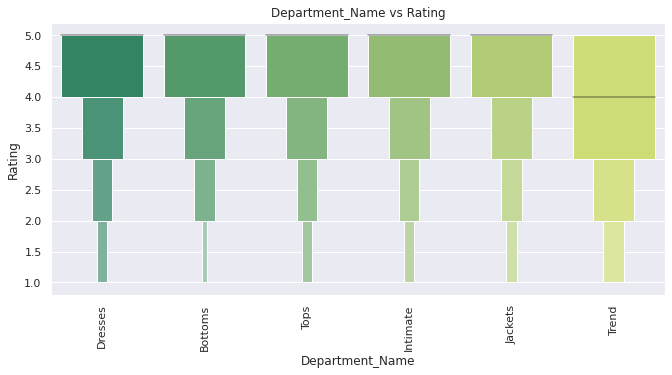

In [55]:
color=plt.cm.ocean(np.linspace(0,1,20))
sns.boxenplot(df['Department_Name'],df['Rating'],palette='summer')
plt.title('Department_Name vs Rating')
plt.xticks(rotation=90)
plt.show()

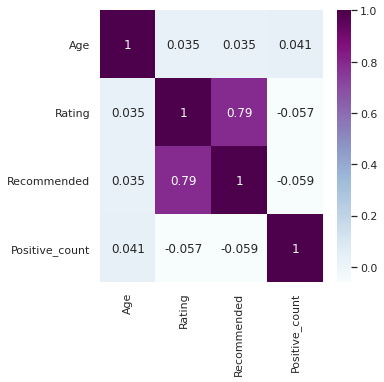

In [56]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(),annot=True,cmap='BuPu')
#Rating and Recommended are highly corelated 

In [57]:
df.Review

0        I had such high hopes for this dress and reall...
1        I love, love, love this jumpsuit. it's fun, fl...
2        This shirt is very flattering to all due to th...
3        I love tracy reese dresses, but this one is no...
4        I aded this in my basket at hte last mintue to...
                               ...                        
19657    I was very happy to snag this dress at such a ...
19658    It reminds me of maternity clothes. soft, stre...
19659    This fit well, but the top was very see throug...
19660    I bought this dress for a wedding i have this ...
19661    This dress in a lovely platinum is feminine an...
Name: Review, Length: 19662, dtype: object

In [58]:
nltk.download('wordnet')
from nltk.corpus import wordnet
def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
nltk.download('averaged_perceptron_tagger')
def clean_text(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [59]:
df["Review_Text"] = np.NaN  
df["Review_Text"] = df["Review"].apply(clean_text)
df["Review_Text"][:5]

0    high hope dress really wanted work initially o...
1    love love love jumpsuit fun flirty fabulous ev...
2    shirt flatter due adjustable front tie perfect...
3    love tracy reese dress one petite foot tall us...
4    aded basket hte last mintue see would look lik...
Name: Review_Text, dtype: object

In [60]:
import re
import nltk
nltk.download('averaged_perceptron_tagger')
allwords =[]
pos = []
review = [x for x in df.Review_Text]
for x in review:
  word = nltk.word_tokenize(x)
  pos+= nltk.pos_tag(word)
  allwords+=word


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [61]:
df1 = pd.DataFrame()
df1["less_rating"]=df.loc[df['Rating'] == 1, 'Review_Text']
review_lessrating = [x for x in df1.less_rating]
allwords1 =[]
pos1 = []
for x in review_lessrating:
  word1 = nltk.word_tokenize(x)
  pos1+= nltk.pos_tag(word1)
  allwords1+=word1
###############################bigram##########  
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder
from operator import itemgetter
finder = BigramCollocationFinder.from_words(allwords1)
bigram_measures = BigramAssocMeasures()
scored = finder.score_ngrams(bigram_measures.raw_freq)  
scoredList = sorted(scored, key=itemgetter(1), reverse=True)
word_dict = {}
listLen = len(scoredList)
print(scoredList)
for i in range(listLen):
    word_dict['_'.join(scoredList[i][0])] = scoredList[i][1]
print(word_dict)    

[(('i', "'m"), 0.0057086125589476296), (('look', 'like'), 0.005261851576073467), (('go', 'back'), 0.0021841648051625713), (('i', "'ve"), 0.001538843385455448), (('ca', "n't"), 0.0014892032762472078), (('make', 'look'), 0.0014395631670389676), (('size', 'small'), 0.001340282948622487), (('dress', 'look'), 0.0009928021841648052), (('nothing', 'like'), 0.0009928021841648052), (('want', 'love'), 0.0009928021841648052), (('first', 'time'), 0.0009431620749565649), (('i', "'d"), 0.0009431620749565649), (('look', 'cute'), 0.0009431620749565649), (('look', 'good'), 0.0008438818565400844), (('poor', 'quality'), 0.0008438818565400844), (('usually', 'wear'), 0.0007942417473318441), (('fit', 'like'), 0.0007446016381236039), (('order', 'size'), 0.0007446016381236039), (('read', 'review'), 0.0007446016381236039), (('think', 'would'), 0.0007446016381236039), (('cold', 'water'), 0.0006949615289153636), (('look', 'great'), 0.0006949615289153636), (('run', 'small'), 0.0006949615289153636), (('send', 'bac

In [62]:
nltk.download('wordnet')
import string
stop = nltk.corpus.stopwords.words('english')
stop=set(stop)
stop.update(['dress','also','one','would','skirt', 'blouse','sweater', 'shirt','bottom',
             'pant', 'pants' 'jean', 'jeans','jacket','top', 'dresse','nan'])
#allwords = [i.lower() for i in allwords if i.lower() not in stop and i.lower() not in string.punctuation and i.lower().isalpha()]
#allwords1 = [i.lower() for i in allwords1 if i.lower() not in stop and i.lower() not in string.punctuation and i.lower().isalpha()]
stemmer = nltk.stem.WordNetLemmatizer()
allwords =[ stemmer.lemmatize(word) for word in allwords]
allwords1 =[ stemmer.lemmatize(word) for word in allwords1]
freq = nltk.FreqDist(allwords)
#freq2 = nltk.FreqDist(allwords1)
plotwords = freq.most_common(10)
print(freq.most_common(10))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[('dress', 10675), ('fit', 9888), ('size', 9396), ('love', 8811), ('look', 8232), ('wear', 7816), ('i', 7708), ('top', 7376), ('like', 6687), ('color', 6348)]


[(('great', 'JJ'), 5303), (('small', 'JJ'), 4662), (('fit', 'JJ'), 3743), (('wear', 'JJ'), 3420), (('large', 'JJ'), 2986), (('soft', 'JJ'), 2957), (('little', 'JJ'), 2865), (('comfortable', 'JJ'), 2552), (('nice', 'JJ'), 2510), (('short', 'JJ'), 2340)]
[(('small', 'JJ'), 157), (('fabric', 'JJ'), 94), (('fit', 'JJ'), 88), (('large', 'JJ'), 84), (('short', 'JJ'), 80), (('great', 'JJ'), 74), (('much', 'JJ'), 73), (('wear', 'JJ'), 71), (('big', 'JJ'), 67), (('good', 'JJ'), 65)]


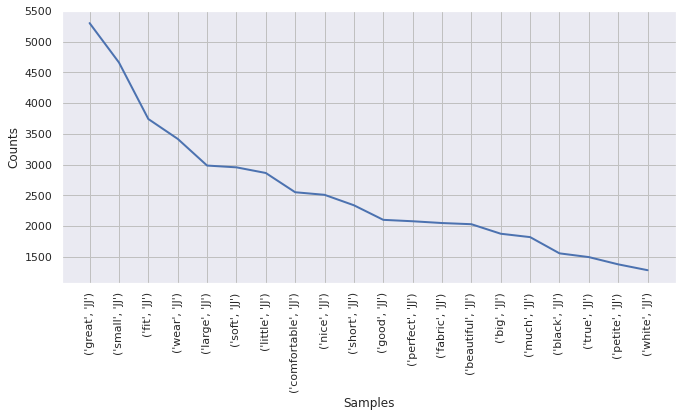

In [63]:
allJJ = [x for x in pos if x[1] == 'JJ' and  x[0].lower() not in stop and x[0].lower() not in string.punctuation and x[0].lower().isalpha()]
allJJ1 = [x for x in pos1 if x[1] == 'JJ' and  x[0].lower() not in stop and x[0].lower() not in string.punctuation and x[0].lower().isalpha()]
allJJwords =[x[0] for x in allJJ] 
allJJwords_neg =[x[0] for x in allJJ1] 
freq1 = nltk.FreqDist(allJJ)
freq_neg = nltk.FreqDist(allJJ1)
print(freq1.most_common(10))
print(freq_neg.most_common(10))
freq1.plot(20,cumulative=False)


In [64]:
 pip install WordCloud

In [99]:
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import numpy as npy
import matplotlib.pyplot as plt


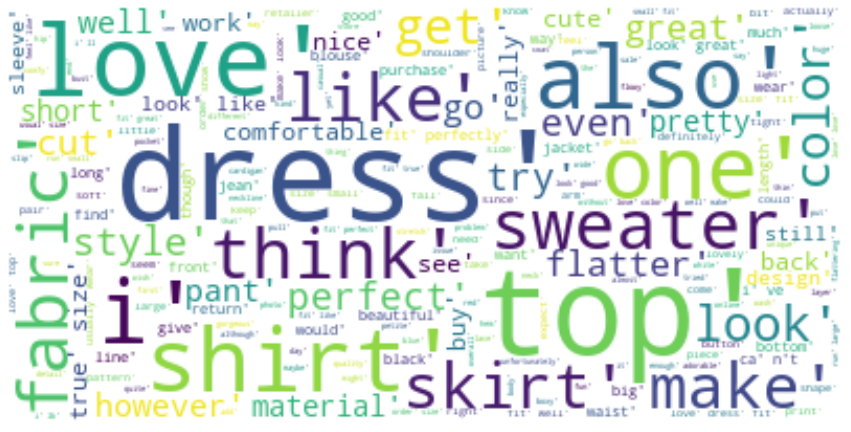

In [100]:
wc = WordCloud(background_color = 'white', max_font_size = 60, max_words =200,contour_width=3, contour_color='firebrick')
wc.generate(str(allwords))
plt.figure(figsize =[15,10])
plt.imshow(wc,interpolation ='bilinear')
plt.axis('off')
plt.show()
wc.to_file("wordCloud.png")

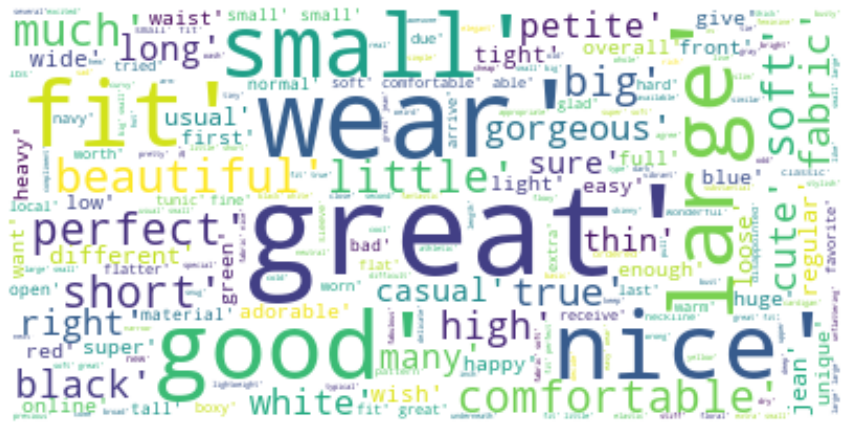

In [101]:
wc.generate(str(allJJwords))
plt.figure(figsize =[15,10])
plt.imshow(wc,interpolation ='bilinear')
plt.axis('off')
plt.show()
wc.to_file("wordCloud1.png")

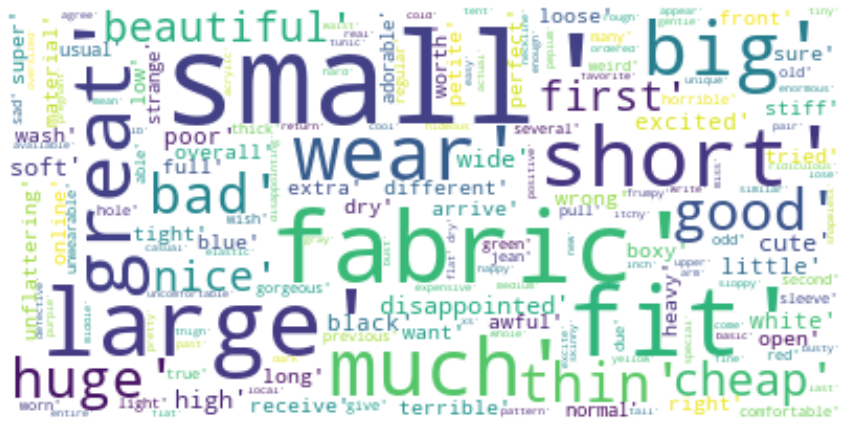

In [102]:
wc.generate(str(allJJwords_neg))
#wc.generate(str(word_dict))
plt.figure(figsize =[15,10])
plt.imshow(wc,interpolation ='bilinear')
plt.axis('off')
plt.show()
wc.to_file("wordCloud3.png")

In [103]:
df['clas'] = np.NaN

In [104]:
for i in range(len(df['Rating'])):
  if df['Rating'][i] > 3:
    df['clas'][i] = 'pos'
  elif df['Rating'][i] < 3:
    df['clas'][i] = 'neg'
  else :
    if df['Recommended'][i] == 1:
      df['clas'][i] = 'pos'
    else:
      df['clas'][i] = 'neg'

In [105]:
df

Age  ... sentiment
0       60  ...       pos
1       50  ...       pos
2       47  ...       pos
3       49  ...       pos
4       39  ...       pos
...    ...  ...       ...
19657   34  ...       pos
19658   48  ...       pos
19659   31  ...       pos
19660   28  ...       pos
19661   52  ...       pos

[19662 rows x 21 columns]

In [106]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import pandas as pd
import numpy as np
%matplotlib inline
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()
import plotly.io as pio
pio.renderers.default = 'colab'


In [107]:
from textblob import TextBlob
import sys
df['Polarity']= df['Review'].apply(lambda x: TextBlob(x).sentiment.polarity,TextBlob(x).sentiment.subjectivity)
df['subjectivity'] =df['Review'].apply(lambda x: TextBlob(x).sentiment.subjectivity)



In [108]:
import plotly
from plotly.graph_objs import Scatter, Layout
from plotly.offline import iplot
plotly.offline.init_notebook_mode(connected=True)
df[['Polarity','subjectivity','clas']]


Polarity  subjectivity clas
0      0.073675      0.356294  neg
1      0.550000      0.625000  pos
2      0.512891      0.568750  pos
3      0.178750      0.533125  neg
4      0.133750      0.607778  pos
...         ...           ...  ...
19657  0.552667      0.710000  pos
19658  0.091667      0.708333  pos
19659  0.414286      0.596429  neg
19660  0.322222      0.577778  pos
19661  0.413889      0.707778  pos

[19662 rows x 3 columns]

In [109]:

df['sentiment1'] = df['Polarity'].apply(lambda c: 'pos' if c>=0 else 'neg')
accuracy_score(df['clas'],df['sentiment1'])

0.8315532499237107

In [115]:
pip install cufflinks

In [116]:
df['Polarity'].iplot(
kind='hist',
    bins=50,
    xTitle='Polarity',
    linecolor='green',
    yTitle='Count',
    title='Sentiment Polarity Distribution')


In [117]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
df['scores'] = df['Review_Text'].apply(lambda review: sid.polarity_scores(review))

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [118]:
df['scores']

0        {'neg': 0.038, 'neu': 0.692, 'pos': 0.27, 'com...
1        {'neg': 0.179, 'neu': 0.183, 'pos': 0.638, 'co...
2        {'neg': 0.0, 'neu': 0.513, 'pos': 0.487, 'comp...
3        {'neg': 0.035, 'neu': 0.725, 'pos': 0.24, 'com...
4        {'neg': 0.049, 'neu': 0.824, 'pos': 0.127, 'co...
                               ...                        
19657    {'neg': 0.104, 'neu': 0.297, 'pos': 0.599, 'co...
19658    {'neg': 0.176, 'neu': 0.6, 'pos': 0.224, 'comp...
19659    {'neg': 0.0, 'neu': 0.491, 'pos': 0.509, 'comp...
19660    {'neg': 0.046, 'neu': 0.538, 'pos': 0.415, 'co...
19661    {'neg': 0.0, 'neu': 0.27, 'pos': 0.73, 'compou...
Name: scores, Length: 19662, dtype: object

In [119]:
df['positive'] = df['scores'].apply(lambda score_dict: score_dict['pos'])
df['negative'] = df['scores'].apply(lambda score_dict: score_dict['neg'])
df['neutral'] = df['scores'].apply(lambda score_dict: score_dict['neu'])
df['compound']  =df['scores'].apply(lambda score_dict: score_dict['compound'])
df['comp_score'] = df['compound'].apply(lambda c: 1 if c >=0 else 0)
df['sentiment'] = df['compound'].apply(lambda c: 'pos' if c >=0.1 else 'neg')

In [ ]:
#print(df['comp_score'].value_counts())
#print(df['compound'][:20])
#print(df['Recommended'].value_counts())
#print(df['clas'].value_counts())
#print(df['comp_score'][:20])


In [120]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(df['clas'],df['sentiment'])



0.8303326212999694

In [121]:
#step 1 , creating Object set        #unnecessary code snippet
tup = []
for i in range(len(df['Rating'])):
  tup+= [(nltk.word_tokenize(df['Review'][i]),df['clas'][i])]
print(tup[:2])  

[(['I', 'had', 'such', 'high', 'hopes', 'for', 'this', 'dress', 'and', 'really', 'wanted', 'it', 'to', 'work', 'for', 'me', '.', 'i', 'initially', 'ordered', 'the', 'petite', 'small', '(', 'my', 'usual', 'size', ')', 'but', 'i', 'found', 'this', 'to', 'be', 'outrageously', 'small', '.', 'so', 'small', 'in', 'fact', 'that', 'i', 'could', 'not', 'zip', 'it', 'up', '!', 'i', 'reordered', 'it', 'in', 'petite', 'medium', ',', 'which', 'was', 'just', 'ok.', 'overall', ',', 'the', 'top', 'half', 'was', 'comfortable', 'and', 'fit', 'nicely', ',', 'but', 'the', 'bottom', 'half', 'had', 'a', 'very', 'tight', 'under', 'layer', 'and', 'several', 'somewhat', 'cheap', '(', 'net', ')', 'over', 'layers', '.', 'imo', ',', 'a', 'major', 'design', 'flaw', 'was', 'the', 'net', 'over', 'layer', 'sewn', 'directly', 'into', 'the', 'zipper', '-', 'it', 'c'], 'neg'), (['I', 'love', ',', 'love', ',', 'love', 'this', 'jumpsuit', '.', 'it', "'s", 'fun', ',', 'flirty', ',', 'and', 'fabulous', '!', 'every', 'time',

In [122]:
X = df["Review_Text"]#+ " " +df['sentiment']  #unnecessary code snippet
y = df["Recommended"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,  random_state = 42)#, random_state = 42

Using Pipeline , by taking CountVectorizer and TfidTransformer as features, using Linear SVC Classifier

In [123]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC, LinearSVC, NuSVC 
from sklearn.pipeline import Pipeline                   #unnecessary code snippet
from sklearn.feature_extraction.text import TfidfTransformer

nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', LinearSVC()),
              ])
nb.fit(X_train, y_train)


from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

accuracy 0.8823529411764706
              precision    recall  f1-score   support

           0       0.73      0.60      0.66      1109
           1       0.91      0.95      0.93      4790

    accuracy                           0.88      5899
   macro avg       0.82      0.77      0.79      5899
weighted avg       0.88      0.88      0.88      5899



In [124]:
from sklearn.model_selection import KFold                         #unncessary code snippet
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=100)
results = cross_val_score(nb, X_test, y_test, cv=kfold)
print(results)
print(results.mean())

[0.84745763 0.89830508 0.88135593 0.91525424 0.93220339 0.88135593
 0.86440678 0.88135593 0.88135593 0.93220339 0.86440678 0.88135593
 0.83050847 0.84745763 0.88135593 0.89830508 0.88135593 0.89830508
 0.89830508 0.86440678 0.91525424 0.81355932 0.84745763 0.89830508
 0.84745763 0.91525424 0.88135593 0.89830508 0.81355932 0.88135593
 0.89830508 0.88135593 0.91525424 0.89830508 0.93220339 0.88135593
 0.91525424 0.86440678 0.89830508 0.88135593 0.88135593 0.79661017
 0.86440678 0.86440678 0.79661017 0.89830508 0.88135593 0.94915254
 0.88135593 0.89830508 0.88135593 0.88135593 0.84745763 0.89830508
 0.88135593 0.86440678 0.91525424 0.93220339 0.91525424 0.88135593
 0.88135593 0.93220339 0.84745763 0.89830508 0.88135593 0.86440678
 0.84745763 0.89830508 0.81355932 0.86440678 0.86440678 0.84745763
 0.89830508 0.84745763 0.93220339 0.83050847 0.79661017 0.88135593
 0.88135593 0.91525424 0.94915254 0.84745763 0.88135593 0.76271186
 0.91525424 0.91525424 0.91525424 0.83050847 0.86440678 0.8644

Using CountVectorizer

Run All Models


In [125]:
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
# BernoulliNB works when the features are binary value
# MultinomialNB works when the features are discrete
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier

In [126]:
# define classifier objects
bernoulliNB  =BernoulliNB()
multinomialNB  =MultinomialNB()
logisticRegression1 =LogisticRegression(solver='newton-cg')
logisticRegression2 =LogisticRegression(solver='liblinear')
svc  =SVC(gamma='auto')
linearSVC  =LinearSVC()
nuSvc  =NuSVC(gamma='auto')
decisionTree = DecisionTreeClassifier() 

In [128]:
def train_And_FindAcc(model,X_train, X_test, y_train, y_test):
    clf = model.fit(X_train, y_train)
    predicted = clf.predict(X_test)
    acc = metrics.accuracy_score(y_test, predicted)
    #print(acc)
    return acc, predicted

In [129]:
from sklearn.model_selection import train_test_split

'''
function RunModels_GetAccuracy : splits the data based on given input(column1,column2)
Runs models : BernoulliNB, MultinomialNB,LogisticRegression,SVC, LinearSVC, NuSVC one by one.
returns the dataframe having 2 columns(col1 : model name,  col2 :  accuracy)
'''

def RunModels_GetAccuracy(column1,column2,IsPipeline):
    #step 1 : split the data:
    X_train, X_test, y_train, y_test = train_test_split(column1, column2, test_size=0.3)
    
    #step 2: run model
    model_list = [bernoulliNB, multinomialNB, logisticRegression1, logisticRegression2,
                  svc, linearSVC, decisionTree]
    acc = []
    model_predictions_df = pd.DataFrame()

    for mod_ind in range(len(model_list)):
        if IsPipeline == True :   #if true create pipeline
             model = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', model_list[mod_ind]),
              ])
        else:
            model = model_list[mod_ind]
        model_accuracy, predictions = train_And_FindAcc(model,X_train, X_test, y_train, y_test)
        acc.append(model_accuracy)
        model_predictions_df[mod_ind] = predictions
        
        
        
    Data = {'Model Name':model_list, 'Accuracy':acc}
    acc_df = pd.DataFrame (Data, columns = ['Model Name','Accuracy']).sort_values(by  = 'Accuracy', axis=0, ascending=False, inplace=False)
    
    return acc_df, model_predictions_df, y_test

Feature : CountVectorizer


In [130]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
from sklearn import metrics
cv = CountVectorizer(ngram_range = (1,1))
text_counts = cv.fit_transform(df["Review_Text"])

countVec_acc_df = pd.DataFrame()
countVec_acc_df, countVec_model_pref_df, y_test_countvec = RunModels_GetAccuracy(text_counts, df['Recommended'],False)
countVec_acc_df

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Name  Accuracy
3  LogisticRegression(C=1.0, class_weight=None, d...  0.881336
2  LogisticRegression(C=1.0, class_weight=None, d...  0.880997
1  MultinomialNB(alpha=1.0, class_prior=None, fit...  0.880149
0  BernoulliNB(alpha=1.0, binarize=0.0, class_pri...  0.870487
5  LinearSVC(C=1.0, class_weight=None, dual=True,...  0.863028
4  SVC(C=1.0, break_ties=False, cache_size=200, c...  0.817766
6  DecisionTreeClassifier(ccp_alpha=0.0, class_we...  0.810476

Comparing average prediction of all models with labels (Count Vectorizer)

In [132]:
countVec_model_pref_df['avg_prediction'] = countVec_model_pref_df.mean(axis=1)
countVec_model_pref_df['final_pred'] = countVec_model_pref_df['avg_prediction'].apply(lambda x: 0 if x < 0.5 else 1)
#countVec_model_pref_df['final_pred'].value_counts()
countVec_model_pref_df

0  1  2  3  4  5  6  avg_prediction  final_pred
0     1  0  0  0  1  0  0        0.253968           0
1     1  1  1  1  1  1  1        1.000000           1
2     1  1  1  1  1  1  1        1.000000           1
3     1  1  1  1  1  1  1        1.000000           1
4     1  1  1  1  1  1  1        1.000000           1
...  .. .. .. .. .. .. ..             ...         ...
5894  1  1  1  1  1  1  1        1.000000           1
5895  1  1  1  1  1  1  1        1.000000           1
5896  1  1  1  1  1  1  1        1.000000           1
5897  1  1  1  1  1  1  1        1.000000           1
5898  1  1  1  1  1  1  1        1.000000           1

[5899 rows x 9 columns]

In [133]:
type(y_test_countvec), y_test_countvec.shape
final_pred = np.array(countVec_model_pref_df['final_pred'])
final_pred.shape
accuracy_avg_model = metrics.accuracy_score(y_test_countvec, final_pred)
accuracy_avg_model

0.882861501949483

Pipeline + All Models (Combination of count vectorizer and tfidf vectorizer)


In [134]:
PipelineVec_acc_df, pipelineVec_model_pref_df, y_test_pipeline = RunModels_GetAccuracy(df["Review_Text"], df['Recommended'],True)


In [135]:
PipelineVec_acc_df

Model Name  Accuracy
5  LinearSVC(C=1.0, class_weight=None, dual=True,...  0.880997
2  LogisticRegression(C=1.0, class_weight=None, d...  0.878793
3  LogisticRegression(C=1.0, class_weight=None, d...  0.878793
0  BernoulliNB(alpha=1.0, binarize=0.0, class_pri...  0.876081
1  MultinomialNB(alpha=1.0, class_prior=None, fit...  0.827428
4  SVC(C=1.0, break_ties=False, cache_size=200, c...  0.822004
6  DecisionTreeClassifier(ccp_alpha=0.0, class_we...  0.815223

comparing average prediction(consider all models) of pipeline with y_test

In [136]:
pipelineVec_model_pref_df['avg_prediction'] = pipelineVec_model_pref_df.mean(axis=1)
pipelineVec_model_pref_df['final_pred'] = pipelineVec_model_pref_df['avg_prediction'].apply(lambda x: 0 if x < 0.5 else 1)
#countVec_model_pref_df['final_pred'].value_counts()
pipelineVec_model_pref_df

0  1  2  3  4  5  6  avg_prediction  final_pred
0     1  1  1  1  1  1  1        1.000000           1
1     1  1  1  1  1  1  0        0.857143           1
2     1  1  0  0  1  1  1        0.714286           1
3     1  1  1  1  1  1  1        1.000000           1
4     1  1  1  1  1  1  1        1.000000           1
...  .. .. .. .. .. .. ..             ...         ...
5894  0  1  0  0  1  0  0        0.285714           0
5895  1  1  1  1  1  1  1        1.000000           1
5896  1  1  1  1  1  1  1        1.000000           1
5897  0  1  0  0  1  0  1        0.428571           0
5898  1  1  1  1  1  1  1        1.000000           1

[5899 rows x 9 columns]

In [137]:
type(y_test_pipeline), y_test_pipeline.shape
final_pred = np.array(pipelineVec_model_pref_df['final_pred'])
final_pred.shape
accuracy_avg_model = metrics.accuracy_score(y_test_pipeline, final_pred)
accuracy_avg_model

0.873876928292931

Feature : TFIDF

In [138]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
text_tf= tf.fit_transform(df["Review_Text"])

tfidfVec_acc_df = pd.DataFrame()
tfidfVec_acc_df, tfidf_model_pref_df, y_test_tfidf = RunModels_GetAccuracy(text_tf, df['Recommended'], False)


In [139]:
tfidfVec_acc_df

Model Name  Accuracy
5  LinearSVC(C=1.0, class_weight=None, dual=True,...  0.883709
3  LogisticRegression(C=1.0, class_weight=None, d...  0.878284
2  LogisticRegression(C=1.0, class_weight=None, d...  0.877776
0  BernoulliNB(alpha=1.0, binarize=0.0, class_pri...  0.868791
1  MultinomialNB(alpha=1.0, class_prior=None, fit...  0.822512
4  SVC(C=1.0, break_ties=False, cache_size=200, c...  0.818783
6  DecisionTreeClassifier(ccp_alpha=0.0, class_we...  0.800136

Comparing average prediction of all models with y_test(TfIdf Vectorizer)

In [140]:
tfidf_model_pref_df['avg_prediction'] = tfidf_model_pref_df.mean(axis=1)
tfidf_model_pref_df['final_pred'] = tfidf_model_pref_df['avg_prediction'].apply(lambda x: 0 if x < 0.5 else 1)
#tfidf_model_pref_df['final_pred'].value_counts()
tfidf_model_pref_df

0  1  2  3  4  5  6  avg_prediction  final_pred
0     1  1  1  1  1  1  1        1.000000           1
1     1  1  1  1  1  1  1        1.000000           1
2     1  1  1  1  1  1  1        1.000000           1
3     1  1  0  0  1  0  0        0.428571           0
4     1  1  1  1  1  1  1        1.000000           1
...  .. .. .. .. .. .. ..             ...         ...
5894  1  1  1  1  1  0  1        0.857143           1
5895  1  1  1  1  1  1  1        1.000000           1
5896  1  1  1  1  1  1  1        1.000000           1
5897  1  1  1  1  1  1  1        1.000000           1
5898  1  1  1  1  1  1  1        1.000000           1

[5899 rows x 9 columns]

In [141]:
type(y_test_tfidf), y_test_tfidf.shape
final_pred = np.array(tfidf_model_pref_df['final_pred'])
final_pred.shape
accuracy_avg_model = metrics.accuracy_score(y_test_tfidf, final_pred)
accuracy_avg_model

0.8743854890659434

Here reviews and sentiments are combined.
Fearture : TF IDF

Ensemble methods


In [142]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

CountVectorizer

In [143]:
cv = CountVectorizer(ngram_range = (1,1))
text_counts = cv.fit_transform(df["Review_Text"])
#X_train, X_test, y_train, y_test = train_test_split(text_counts, df['Recommended'], test_size=0.3)

In [144]:
clf = DecisionTreeClassifier(max_depth=None, min_samples_split=2)

In [145]:
scores = cross_val_score(clf, text_counts, df['Recommended'], cv=5)

In [146]:
scores.mean()

0.8126331464026514

In [147]:
clf = RandomForestClassifier(n_estimators=10, max_depth=None,min_samples_split=2, random_state=0)
scores = cross_val_score(clf, text_counts, df['Recommended'], cv=5)

In [148]:
scores.mean()

0.8491000323578639

In [149]:
clf = ExtraTreesClassifier(n_estimators=10, max_depth=None,min_samples_split=2, random_state=0)
scores = cross_val_score(clf, text_counts, df['Recommended'], cv=5)

In [150]:
scores.mean() 

0.8526085197661025

TF_IDF


In [151]:
tf=TfidfVectorizer()
text_tf= tf.fit_transform(df["Review_Text"])

In [152]:
clf = ExtraTreesClassifier(n_estimators=10, max_depth=None,min_samples_split=2, random_state=0)
scores = cross_val_score(clf, text_tf, df['Recommended'], cv=5)
scores.mean()

0.8469636244325411

In [153]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=100)
scores = cross_val_score(clf, text_tf, df['Recommended'], cv=5)
scores.mean()

0.8644082377793453

In [154]:
from sklearn.ensemble import GradientBoostingClassifier
X_train, X_test, y_train, y_test = train_test_split(text_tf, df['Recommended'], test_size=0.3, random_state = 42)
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(X_train, y_train)
clf.score(X_test, y_test)

0.8586201051025597

In [155]:
PipelineVec_acc_df, pipelineVec_model_pref_df, y_test_pipeline = RunModels_GetAccuracy(df["Review_Text"], df['Recommended'],True)

In [156]:
PipelineVec_acc_df

Model Name  Accuracy
2  LogisticRegression(C=1.0, class_weight=None, d...  0.877267
3  LogisticRegression(C=1.0, class_weight=None, d...  0.877267
5  LinearSVC(C=1.0, class_weight=None, dual=True,...  0.876928
0  BernoulliNB(alpha=1.0, binarize=0.0, class_pri...  0.869639
1  MultinomialNB(alpha=1.0, class_prior=None, fit...  0.814375
4  SVC(C=1.0, break_ties=False, cache_size=200, c...  0.810646
6  DecisionTreeClassifier(ccp_alpha=0.0, class_we...  0.797762

In [157]:
import tensorflow as tf
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')

cv = CountVectorizer(lowercase=True,stop_words='english', ngram_range = (1,1), tokenizer = token.tokenize)
text_counts = cv.fit_transform(df["Review_Text"])

Review = df["Review_Text"].values
Recommended =df['Recommended'].values

Review_train, Review_test, y_train, y_test = train_test_split(Review, Recommended, test_size=0.25, random_state=1000)


# scaler_object.fit(X_train)
# scaled_X_train = scaler_object.transform(X_train)
# scaled_X_test = scaler_object.transform(X_test)
# X_train.max()
# scaled_X_train.max()
vectorizer = CountVectorizer()
vectorizer.fit(Review_train)

X_train = vectorizer.transform(Review_train)
X_test  = vectorizer.transform(Review_test)
print(X_train.shape)
print(y_train.shape)


(14746, 9956)
(14746,)


In [158]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
input_dim = X_train.shape[1]

model = Sequential()
model.add(Dense(128, input_dim=input_dim, activation='relu'))
model.add(Dense(64,  activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [160]:
model.fit(X_train, y_train, epochs=10, verbose=2)

Epoch 1/10
461/461 - 2s - loss: 0.0000e+00 - accuracy: 0.8183
Epoch 2/10
461/461 - 2s - loss: 0.0000e+00 - accuracy: 0.8183
Epoch 3/10
461/461 - 2s - loss: 0.0000e+00 - accuracy: 0.8183
Epoch 4/10
461/461 - 2s - loss: 0.0000e+00 - accuracy: 0.8183
Epoch 5/10
461/461 - 2s - loss: 0.0000e+00 - accuracy: 0.8183
Epoch 6/10
461/461 - 2s - loss: 0.0000e+00 - accuracy: 0.8183
Epoch 7/10
461/461 - 2s - loss: 0.0000e+00 - accuracy: 0.8183
Epoch 8/10
461/461 - 2s - loss: 0.0000e+00 - accuracy: 0.8183
Epoch 9/10
461/461 - 2s - loss: 0.0000e+00 - accuracy: 0.8183
Epoch 10/10
461/461 - 2s - loss: 0.0000e+00 - accuracy: 0.8183


In [161]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1274496   
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 1,284,865
Trainable params: 1,284,865
Non-trainable params: 0
_________________________________________________________________


In [162]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.8183
Testing Accuracy:  0.8179
